## EX 1- MNIST Handwritten Digits

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8802 - loss: 0.4265
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9637 - loss: 0.1242
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9758 - loss: 0.0810
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9835 - loss: 0.0568
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9873 - loss: 0.0426
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.0830
Test accuracy: 97.88%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


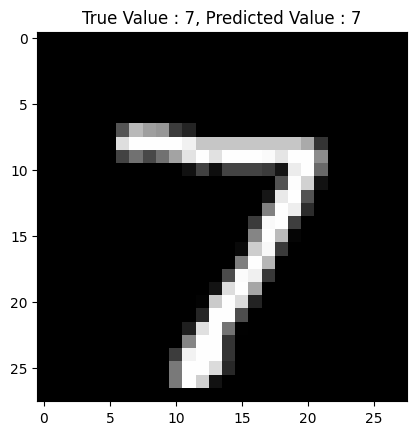

In [ ]:
# Dense Layers EX 1- MNIST Handwritten Digits

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

#Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build Models
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Dense layers expect a 1D input, so whenever the preceding layer produces xle dimensional output,
# we must flatten it to 1D before passing it to a Dense Layer

# If the input to a Dense layer is not already 1D, use Flatten to convert it to 1D


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

predictions = model.predict(x_test)

plt.imshow(x_test[0], cmap='gray')
plt.title(f"True Value : {y_test[0]}, Predicted Value : {np.argmax(predictions[0])}")
plt.show()








# EX 2- House Price Prediction (Regression)

# Synthetic Dataset (Random Data )

In [ ]:
# ex 2(1)- House Price Prediction (Regression) with Synthetic dataset
# predict house prices based on 10 numerical features (bedroom, hall, gym, etc)

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset(1000 samples, 10 features)
np.random.seed(42)
x_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000) * 500000 # House price btw 0-500k

x_test = np.random.rand(200, 10)
y_test = np.random.rand(200) * 500000

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) # single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)


# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE: ${test_mae:.2f}')

# Make a prediction
sample_input = np.random.rand(1, 10)
predicted_price = model.predict(sample_input)
print(f'Predicted House Price: ${predicted_price[0][0]:.2f}')


# MAE is around 247k - 255k which means on avg, the prdictions are nearly half of the actual house price.
# This is very bad cause an error of $247k in a price range of 500k means the model is almost RANDOM.
# the data set is completely random, meaning there is no real pattern for the model to learn.
# the model is gussing house prices randomly, which is why MAE is large.
# IN SHORT MODEL IS BAD :(












Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 82320695296.0000 - mae: 247479.6406
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 83527434240.0000 - mae: 249238.6562
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82326757376.0000 - mae: 247552.3750
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85524881408.0000 - mae: 255098.6406
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81525383168.0000 - mae: 248463.6094
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82428575744.0000 - mae: 248826.4844
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 86197788672.0000 - mae: 256109.9062
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84890107904.0000 - mae: 254563.9844
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84222877696.0000 - mae: 253115.4844
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 84607836160.0000 - mae: 251431.0000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87390011392.00

# Synthetic Dataset and Normalization (50 - 50 acc )

In [ ]:
# Ex2(2)- House Price Prediction (Regression) with Synthetic Dataset and Normalization

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Generate synthetic dataset (1000 samples, 10 features in) [0, 1] range (normalization)

np.random.seed(42)
x_train = np.random.rand(1000, 10)
y_train = np.random.rand(1000) # Target values in range 0-1

x_test = np.random.rand(200, 10)
y_test = np.random.rand(200) # Target values in range 0-1

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) # single output for regression
])

# complie model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate model
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f'Test MAE (Normalized): ${test_mae:.4f}')

# Make prediction
sample_input = np.random.rand(1, 10) # in [0, 1] range
predicted_value = model.predict(sample_input)
print(f'Predicted value (Normalized): ${predicted_value[0][0]:.4f}')

# THIS IS ALSO A BAD MODEL CAUSE WE ARE STILL training on the random values (just normalized values)





















Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2293 - mae: 0.3867
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0944 - mae: 0.2619
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0862 - mae: 0.2516
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0813 - mae: 0.2425
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0855 - mae: 0.2516
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0805 - mae: 0.2424
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0855 - mae: 0.2516
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0834 - mae: 0.2477
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0804 - mae: 0.2435
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0776 - mae: 0.2362
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1001 - mae: 0.2721  


Test MAE (Normalized): $0.2647
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted value (Normalized): $0.5187


# Dataset from Scikit-learn (100%) Actual DATA

In [ ]:
 # EX 2(3)- House Price Prediction (Regression) with Dataset (Real)


 import tensorflow as tf
 from tensorflow.keras import layers, models
 from sklearn.datasets import fetch_california_housing
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import StandardScaler
 import numpy as np

 # Load california_housing dataset
 data = fetch_california_housing()
 x, y = data.data, data.target # Features and target (medain house value in 100,000s)

 print(f"Target value Range (in 100,000s): Min = {y.min():.2f}, Max = {y.max():.2f}, mean = {y.mean():.2f}")

 # Split data into train and test sets
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

 #Normalize [0, 1] features for better training stability -> z-Score Standardization / Standard scaling
 scaler = StandardScaler()
 x_train = scaler.fit_transform(x_train) # compute mean & std from training data, then  scale
 x_test = scaler.transform(x_test) # use the same scaling parameters to transfrom test data

 # We use the same mean and std deviation (computed from x_train) to scale x_test
 # This ensures that both training and test data follow the same distribution

 # If we include x_test when computing mean and std devi, the model gets info from the test set before training
 # this is called DATA LEAKAGE, which can lead to unrealistically good perfromance and poor generalization to new data

 # In real-world applcns, new data arrives after training. we don't need to recompute the mean and std for each new data pt.
 # The model should be able to handle unseen data using the same scaling applied during training

 # Build Model
 model = models.Sequential([
     layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)), # Input features from dataset
     layers.Dense(32, activation='relu'),
     layers.Dense(1) # single output for regression
 ])

 # compile model
 model.compile(optimizer='adam', loss='mse', metrics=['mae'])

 # Train model
 model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

 # Evaluate model
 test_loss, test_mae = model.evaluate(x_test, y_test)
 print(f'Test MAE: ${test_mae * 100000:.2f}') # Convert to actual dollars

 # Make Prediction
 sample_input = np.expand_dims(x_test[0], axis=0) # Take one test sample
 predicted_price = model.predict(sample_input)
 print(f'Predicted House Price: ${predicted_price[0][0] * 100000:.2f}') # convert to actual dollars

Target value Range (in 100,000s): Min = 0.15, Max = 5.00, mean = 2.07


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5519 - mae: 0.8836
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4098 - mae: 0.4576
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3948 - mae: 0.4404
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3588 - mae: 0.4212
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3342 - mae: 0.4077
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3473 - mae: 0.4140
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3215 - mae: 0.3971
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3114 - mae: 0.3893
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3180 - mae: 0.3901
Epoch 10/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3143 - mae: 0.3845
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3035 - mae: 0.3769
Test MAE: $37957.41
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted House Price: $54324.59


# EX 3- Sentiment Analysis (Binary Classification)

# Without Embedding Layer

In [ ]:
# EX 3(1)- Sentiment Analysis (Binary Classification) - Without Embedding Layer
# Classify whether a review is +ve or -ve

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=1000)

# IMDB reviews have differnet lenght, but Dense expects a fixed nor of nuerons
# we are ensuring every input is exactly 200 words

# Pad sequences to ensure fixed-length inputs
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# Build model using only Dense layers
model = models.Sequential([
    layers.Flatten(input_shape=(200,)), # Convert 2D sequences to 1D
    layers.Dense(64, activation='relu', input_shape=(200,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Binary classification output
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Make a prediction on the first test sample
predicted_sentiment = model.predict(x_test[0:1])
print("Predicted Sentiment:", "Positive" if predicted_sentiment[0][0] > 0.5 else "Negative")

# NOTE : Here the ACC is 50% without using embedding layer which is bad :(
# for next model we use embedding layer which increases the ACC :)














17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4988 - loss: 11.0086
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5058 - loss: 0.7008
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5055 - loss: 0.6956
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4990 - loss: 0.6932
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5097 - loss: 0.6915
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5071 - loss: 0.7035
Test Accuracy: 50.28%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Predicted Sentiment: Positive


# With Embedding Layer

The Embedding layer **transfroms integer word indices into dense vector representations.**

**Why is This Useful ?**

  **.Captures Wrod menaing (similar words)**

  **.Avoids Numeric Misinterpretation**
  
  **.Enables word Relationships**


In [ ]:
# EX 3(2)-  Sentiment Analysis (Binary Classification) With Embedding Layer

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=1000)

# Pad sequences to ensure fixed-length inputs
x_train = pad_sequences(x_train, maxlen=200)
x_test = pad_sequences(x_test, maxlen=200)

# Build model using only dense layers with an Embedding Layer
model = models.Sequential([
    layers.Embedding(input_dim=1000, output_dim=128, input_length=200), # Converts word indices to vectors
    layers.Flatten(), # Flatten embeddings into a 1D vector
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Binary classification output
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, batch_size=512)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


# NOTE : Here the ACC is 82% with using embedding layer which is GOOD :)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 338ms/step - accuracy: 0.5808 - loss: 0.6540
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 354ms/step - accuracy: 0.8694 - loss: 0.3092
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 16s 332ms/step - accuracy: 0.9497 - loss: 0.1560
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 353ms/step - accuracy: 0.9919 - loss: 0.0460
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 19s 333ms/step - accuracy: 0.9987 - loss: 0.0112
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8204 - loss: 0.6990
Test Accuracy: 82.06%


# EX 4- Breast Cancer Prediction (Binary Classification)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4529 - loss: 0.7002 - val_accuracy: 0.9035 - val_loss: 0.4423
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9192 - loss: 0.4042 - val_accuracy: 0.9649 - val_loss: 0.2819
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9541 - loss: 0.2689 - val_accuracy: 0.9737 - val_loss: 0.1849
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9647 - loss: 0.1799 - val_accuracy: 0.9649 - val_loss: 0.1313
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9547 - loss: 0.1632 - val_accuracy: 0.9649 - val_loss: 0.1025
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9783 - loss: 0.0976 - val_accuracy: 0.9649 - val_loss: 0.0874
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9792 - loss: 0.0898 - val_accuracy: 0.9649 - val_loss: 0.0807
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9864 - loss: 0.0704 - val_accuracy: 0.9649 - val_loss: 0.0766
Ep

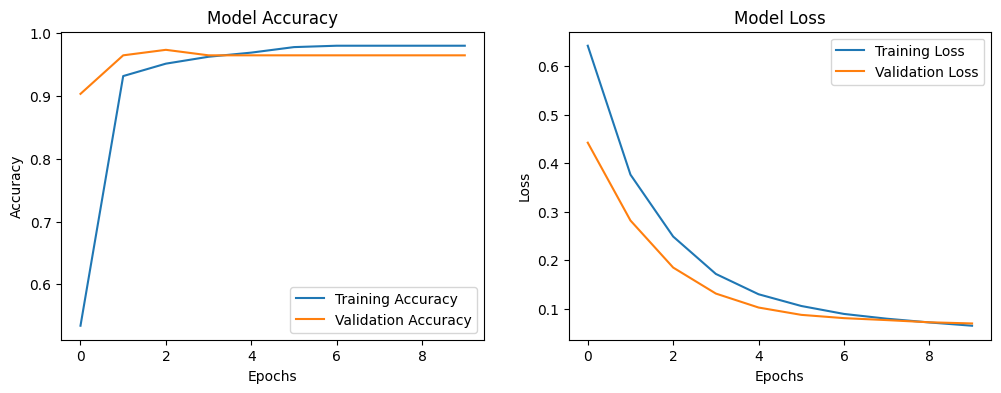

In [ ]:
# The Breast Cancer dataset from Scickit-Learn contains 569 samples with 30 numerical features extracted
# from digitized imgs of breast mass tumors, the goal is to classify tumors as malignant (1) or benign (0)
# based on these features. the dataset was orginally created from the Wisconsin Diagnostic Brest Cancer (WDBC)
# dataset is commonly used for binary calssification tasks in ML.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models


# Load dataset
data = load_breast_cancer()
x, y = data.data, data.target # Features and labels

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize data [0 - 1]
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Binary classification output
])

# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data = (x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Plot accuracy and loss using Matplotlib
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


















# EX 5- Wine Quality Prediction (xle Classification)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.2851 - loss: 1.1361 - val_accuracy: 0.3333 - val_loss: 1.0088
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6008 - loss: 0.9093 - val_accuracy: 0.7222 - val_loss: 0.8221
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8320 - loss: 0.7420 - val_accuracy: 0.8333 - val_loss: 0.6795
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9357 - loss: 0.6049 - val_accuracy: 0.8333 - val_loss: 0.5677
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9354 - loss: 0.5083 - val_accuracy: 0.8333 - val_loss: 0.4798
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9654 - loss: 0.4292 - val_accuracy: 0.8333 - val_loss: 0.4087
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9832 - loss: 0.3480 - val_accuracy: 0.8611 - val_loss: 0.3494
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9866 - loss: 0.2829 - val_accuracy: 0.8889 - val_loss: 0.3010
Epoch 9/20


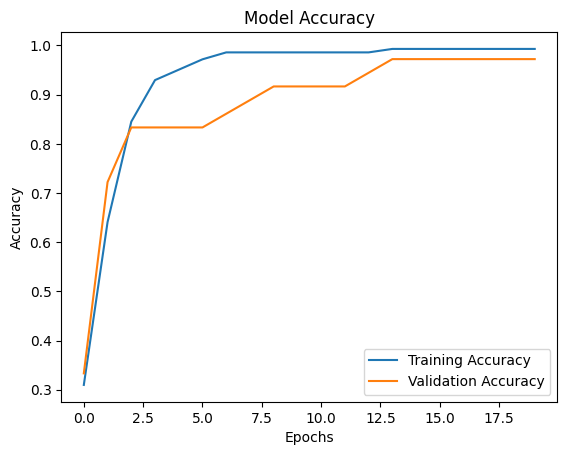

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted Class: 0, Actual Class :0


In [ ]:
# The wine dataset from scikit-Learn contains 178 samples with 13 numerical features,
# such as alcohol content, flavonoids, and phenols, representing diff chemical properties of wines.
# The goal is to classify wines into 3 types (class 0, 1, 2 => Train, Test, Validation) based on their composition
# It orginates from the UCI ML Repository and is commonly used for xlti class calssfication tasks

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset
data = load_wine()
x, y = data.data, data.target # Features and labels

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features using z-score standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Build a NN model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax') # 3 output classes(0, 1, 2)
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # since y is not one-hot encoded
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

# predicit a sample
sample_input = np.expand_dims(x_test[0], axis=0) # take one test sample
predicted_class = np.argmax (model.predict(sample_input))
print(f'Predicted Class: {predicted_class}, Actual Class :{y_test[0]}')


# using stratify=y ensures that the proportion of each class remains the same in both training and testing sets,
# leading to a more balanced and representative split.

# EX : without stratify=y
#If you have a dataset with 80% Class 0, 15% Class 1, and 5% Class 2,
#random split without stratification wight result in:

#Training set: 90% Class 0, 8% Class 1. 2% Class 2
#Test set: 60% Class 0, 30% Class 1, 10% Class 2

#This skews the distributich, leading to poor generalization.

#Example: with stratifywy

#Training set: 80% Class 0, 15% Class 1, 5% Class 2
#Test set: 80% Class 0, 15% Class 1, 5% Class 2

#This ensures a balanced representation of all classes in both sets.

#Always use stratify=y when working with classification problems, especially when your dataset has an unequal class distribution.


















/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8049 - loss: 0.6172 - val_accuracy: 0.9558 - val_loss: 0.1366
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9469 - loss: 0.1820 - val_accuracy: 0.9690 - val_loss: 0.1020
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9610 - loss: 0.1352 - val_accuracy: 0.9723 - val_loss: 0.0877
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9650 - loss: 0.1151 - val_accuracy: 0.9719 - val_loss: 0.0915
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9698 - loss: 0.0985 - val_accuracy: 0.9752 - val_loss: 0.0787
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9711 - loss: 0.0935
Test Accuracy: 97.52%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


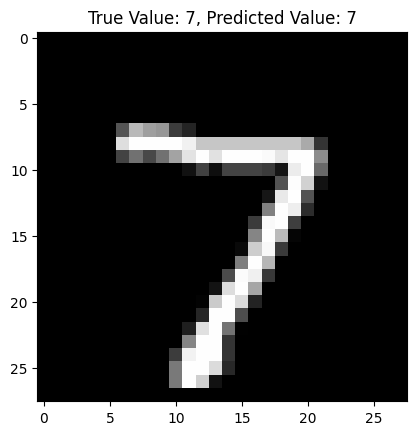

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

#Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model with Dropout layers
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)), # Convert 28 x 28 img to 1D
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2), # Drop 20% of neurons to reduce overfitting
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3), # Drop 30% of neurons
    layers.Dense(10, activation='softmax') # output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test)) # Added validation data

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

# Make Prediction
predictions = model.predict(x_test) # Added predictions variable

plt.imshow(x_test[0], cmap='gray')
plt.title(f"True Value: {y_test[0]}, Predicted Value: {np.argmax(predictions[0])}") # Corrected f-string syntax
plt.show()